In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [45]:
data_set = pd.read_csv('Polynomial-Regression-data.csv')
x = data_set.iloc[:, 1:-1].values
y = data_set.iloc[:, -1].str.replace("," , "").astype(float).values

In [46]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [47]:
y= y.reshape(len(y),1)
y

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

In [48]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [49]:
y = sc_y.fit_transform(y)

y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [50]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)


In [51]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y.ravel())



SVR()

In [52]:
sc_y.inverse_transform((regressor.predict(sc_x.transform([[6.5]]))).reshape(-1, 1))


array([[0.01150915]])

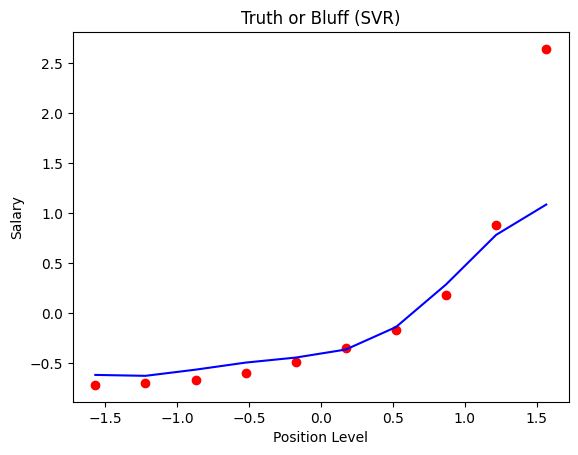

In [53]:
plt.scatter(sc_x.inverse_transform(x) , sc_y.inverse_transform(y) , color = "red")
plt.plot(sc_x.inverse_transform(x) , sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)) , color="blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()


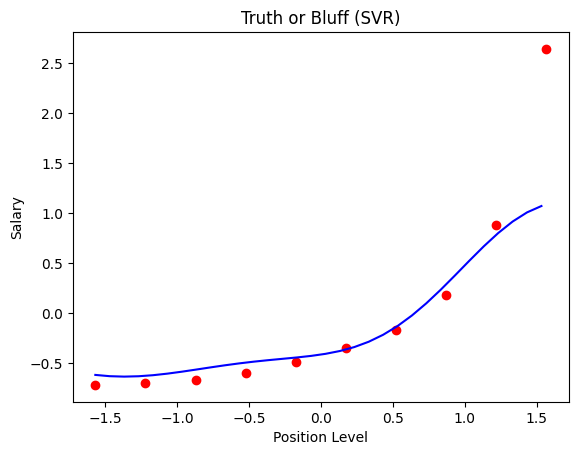

In [57]:
x_grid = np.arange(min(sc_x.inverse_transform(x).ravel()), max(sc_y.inverse_transform(x).ravel()), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x) , sc_y.inverse_transform(y) , color = "red")
plt.plot(x_grid , sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)) , color="blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()